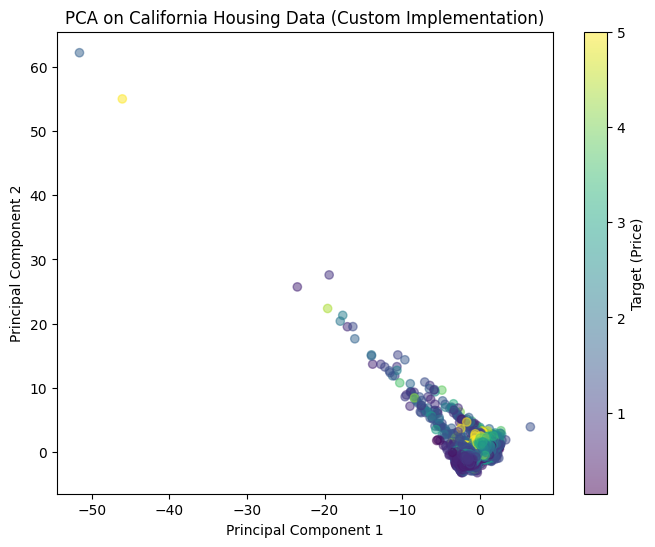

Explained variance ratio for each component: [0.25336868 0.23516245]
Total explained variance: 0.48853112669227217


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing

# Step 1: Load the dataset (California Housing)
data = fetch_california_housing()
X = data.data  # Features
y = data.target  # Target variable (housing prices)

# Step 2: Convert the data into a DataFrame
df = pd.DataFrame(X, columns=data.feature_names)

# Step 3: Standardize the data (mean 0, variance 1)
df_standardized = (df - df.mean()) / df.std()

# Step 4: Compute the covariance matrix
cov_matrix = np.cov(df_standardized, rowvar=False)

# Step 5: Compute the eigenvalues and eigenvectors of the covariance matrix
eigvals, eigvecs = np.linalg.eig(cov_matrix)

# Step 6: Sort the eigenvalues and corresponding eigenvectors in descending order
sorted_indices = np.argsort(eigvals)[::-1]
sorted_eigvals = eigvals[sorted_indices]
sorted_eigvecs = eigvecs[:, sorted_indices]

# Step 7: Select the top k eigenvectors (here, k=2 for 2D projection)
top_k_eigvecs = sorted_eigvecs[:, :2]

# Step 8: Project the data onto the top k eigenvectors (reduce to 2D)
X_pca = np.dot(df_standardized, top_k_eigvecs)

# Step 9: Visualize the 2D projection
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', marker='o', alpha=0.5)
plt.colorbar(label='Target (Price)')
plt.title('PCA on California Housing Data (Custom Implementation)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

# Step 10: Explained variance (proportion of variance explained by each principal component)
explained_variance = sorted_eigvals / np.sum(sorted_eigvals)
print(f"Explained variance ratio for each component: {explained_variance[:2]}")
print(f"Total explained variance: {np.sum(explained_variance[:2])}")
